In [ ]:
from keras.models import load_model
model = load_model('/content/resnet101_keras_94.97.h5')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
y_true_label = y_test
y_true_label = y_test.reshape(-1)
print(y_true_label)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
[3 8 8 ... 5 1 7]


In [ ]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(model.evaluate(X_test, y_test))
#print('Test Loss:', loss)
#print('Test Accuracy:', accuracy)

In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 58s 178ms/step


In [ ]:
y_pred_t = np.argmax(y_pred, axis=-1)
print(y_pred_t)

[3 8 8 ... 5 1 7]


In [ ]:
# Calculate base accuracy by hand
success = 0
samples = float(len(y_pred_t))
for ii in range(len(y_pred_t)):
  if y_pred_t[ii] == y_true_label[ii]:
    success+=1
print(f"Accuracy: {success/samples}")

Accuracy: 0.9497


Code for simulating 9 GRID on base images

In [ ]:
success=0
samples=0
for ii in range(0, len(y_pred_t)-1, 9):
  hits=0
  for jj in range(ii, ii+9):
    if(y_pred_t[jj] == y_true_label[jj]):
      hits += 1
  if hits >= 6:
    success += 1
  samples += 1

print(f"Accuracy: {success/samples}")

Accuracy: 0.9945994599459946


In [ ]:
# Generate adversarial attacks
import numpy as np

x_adv_fgsm = np.load('/content/X_Resnet101_adv_FGSM.npy')
x_adv_hopskip = np.load('/content/X_Resnet101_adv_Hopskip.npy')
x_adv_pgd = np.load('/content/X_Resnet101_adv_PGD.npy')
print(f"{x_adv_fgsm.shape}")
print(f"{x_adv_hopskip.shape}")
print(f"{x_adv_pgd.shape}")

(10000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# Generate labels for noise x_test
y_adv_fgsm = model.predict(x_adv_fgsm)
y_adv_fgsm = np.argmax(y_adv_fgsm, axis=-1)
print(y_adv_fgsm)

y_adv_hopskip = model.predict(x_adv_hopskip)
y_adv_hopskip = np.argmax(y_adv_hopskip, axis=-1)
print(y_adv_hopskip)

y_adv_pgd = model.predict(x_adv_pgd)
y_adv_pgd = np.argmax(y_adv_pgd, axis=-1)
print(y_adv_pgd)

313/313 [==============================] - 56s 178ms/step
[3 8 8 ... 5 1 7]
313/313 [==============================] - 56s 178ms/step
[7 3 3 ... 3 0 7]
313/313 [==============================] - 55s 177ms/step
[8 8 8 ... 8 0 6]


## Code for simulating ensemble of adversarial attacks on CIFAR test images

In [ ]:
success = 0
samples = len(y_pred_t)
for ii in range(0, len(y_pred_t)-1):
  if ii%3==0:
      if y_adv_fgsm[ii] == y_true_label[ii]:
        success += 1
  elif ii%3==1:
      if y_adv_hopskip[ii] == y_true_label[ii]:
        success += 1
  else:
      if y_adv_pgd[ii] == y_true_label[ii]:
        success += 1

print(f"Accuracy: {success/samples * 100}%")

Accuracy: 41.959999999999994%


## Getting the adversarial diffs

In [ ]:
import numpy as np
x_adv = np.load('/content/X_Resnet101_adv_PGD.npy')
fsgm_diff = x_adv[10] - X_test[10]

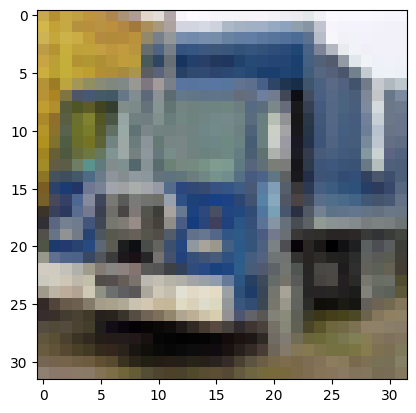

In [ ]:
plt.imshow(X_test[14])

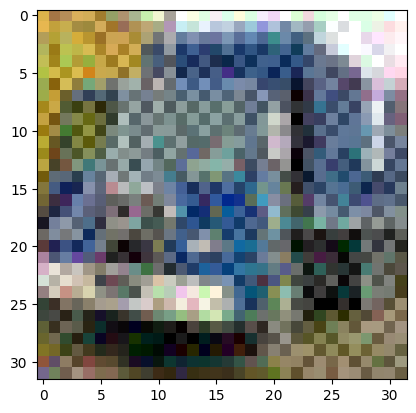

In [ ]:
plt.imshow(X_test[14] + fsgm_diff)

In [ ]:
np.save('pgd_attack_diff.npy', fsgm_diff)